In [1]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)

In [2]:
#read in the data
df = pd.read_csv(r'C:\Users\krist\Documents\Portfolio_projects\Python Correlation Project\movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

Clean the data

In [4]:
#check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, pct_missing))

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [5]:
#count rows with at least 1 missing value
sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0)
#https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe

2247

In [6]:
#number of null values in each column
df.isna().sum()[df.isna().sum()>0]

rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
#total number of rows, columns
df.shape

(7668, 15)

In [8]:
#replace null values pf numeric columns with average value (not conditional on any variable) 
df = df.fillna(df.mean())

In [9]:
df.isna().sum()[df.isna().sum()>0] #these are non-numeric columns, shouldn't affect correlations

rating      77
released     2
writer       3
star         1
country      3
company     17
dtype: int64

In [48]:
#return rows where rating is null
#df[df.isnull().any(axis='columns')]

In [11]:
#data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
#remove excess decimal places
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [13]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [14]:
df.released.dtype

dtype('O')

In [15]:
#Year and released columns should match, at least for the year.

#create a new column, take year from released using string (this would work if the year was listed first)
# df['year_correct'] = df['released'].astype(str).str[:4]

#take year from released using regex
df['year_correct'] = df['released'].str.extract('(\d{4})') #.astype('int')

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

In [16]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
year_correct     object
dtype: object

In [17]:
#convert year_correct into int64 or datetime year
df['year_correct'].isnull().any()

True

In [18]:
df['year_correct'].isna().sum()

2

In [19]:
#Drop the two rows where year_correct is null.
df = df.dropna(axis=0, how='all', subset=['year_correct'])

In [20]:
df.isna().sum()

name             0
rating          77
genre            0
year             0
released         0
score            0
votes            0
director         0
writer           3
star             1
country          1
budget           0
gross            0
company         15
runtime          0
year_correct     0
dtype: int64

In [21]:
#convert year_correct to integer
df['year_correct'] = df['year_correct'].astype(int)

In [49]:
#Examine where year_correct does not match year
df[['name', 'year', 'year_correct']][df['year_correct'] != df['year']].head()

name  year  year_correct
8   5280  1980          1981
11  5919  1980          1984
21  2451  1980          1981
33  1103  1980          1981
40  6747  1980          1981

In [50]:
#order by gross revenue
df.sort_values(['gross'], inplace=False, ascending=False).head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6894       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5143       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  year_correct  
5445  2334       55  237000000  2847246203     2253    162.0          2009  
7445  2241       55  356000000  2797501328     1606    181.0          2019  
3045  1595       55  200000000  2201647264     2253    194.0          1997  
6663   524       55  245000000  2069521700     1540    138.0          2015  
7244  2241       55  321000000  2048359754     1606    149.0          2018

In [24]:
#view all rows
pd.set_option('display.max_rows', None)

In [25]:
df.shape

(7666, 16)

In [26]:
#check for and drop duplicates
df[df.duplicated()] #no duplicates
#if there were duplicates:
# df.drop_duplicates().sort_values(ascending=False)


Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, year_correct]
Index: []

In [27]:
df['company'].sort_values(ascending = False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [28]:
#check for data quality, aggrigate multiple names for company?
#Not for Walt Disney Pictures (4 different names), because their name changed over time, different companies.

What variables are most closely correlated with gross revenue?

In [29]:
#initial prediction from intuition
#budget, company

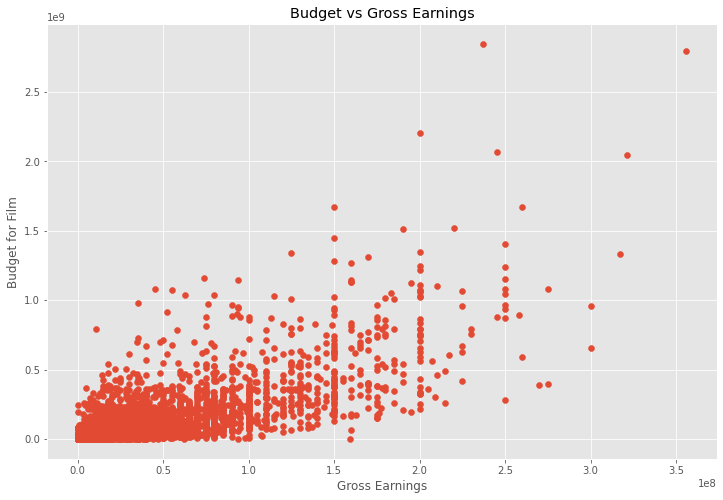

In [30]:
#budget vs gross revenue
plt.scatter(x= df['budget'], y= df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

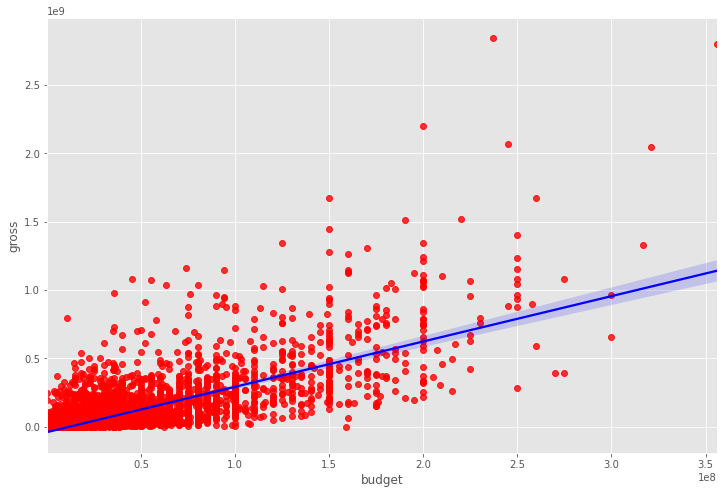

In [31]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [32]:
#numeric variable correlations
df.corr(method='pearson') #pearson, kendall, spearman (pearson correlation coefficient is default)

year     score     votes    budget     gross   runtime  \
year          1.000000  0.098112  0.222818  0.265604  0.252066  0.120778   
score         0.098112  1.000000  0.409221  0.064545  0.182880  0.399356   
votes         0.222818  0.409221  1.000000  0.421007  0.628714  0.309167   
budget        0.265604  0.064545  0.421007  1.000000  0.711270  0.265287   
gross         0.252066  0.182880  0.628714  0.711270  1.000000  0.241335   
runtime       0.120778  0.399356  0.309167  0.265287  0.241335  1.000000   
year_correct  0.997415  0.105932  0.218300  0.259546  0.245462  0.120604   

              year_correct  
year              0.997415  
score             0.105932  
votes             0.218300  
budget            0.259546  
gross             0.245462  
runtime           0.120604  
year_correct      1.000000

In [33]:
#High correlation between budget and gross

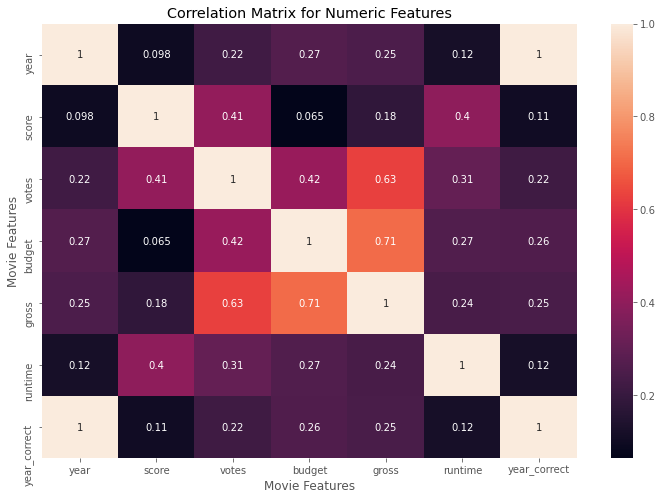

In [34]:
#correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [35]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
year_correct      int32
dtype: object

In [36]:
#correlation of company and gross, one-hot encode categorical variables
categorical = df.select_dtypes(include=['object']).columns

dfOneHotEncoded= pd.get_dummies(df, columns = categorical)

In [37]:
categorical


Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company'],
      dtype='object')

In [51]:
dfOneHotEncoded.head()

year  score      votes    budget      gross  runtime  year_correct  \
0  1980    8.4   927000.0  19000000   46998772    146.0          1980   
1  1980    5.8    65000.0   4500000   58853106    104.0          1980   
2  1980    8.7  1200000.0  18000000  538375067    124.0          1980   
3  1980    7.7   221000.0   3500000   83453539     88.0          1980   
4  1980    7.3   108000.0   6000000   39846344     98.0          1980   

   name_'71  name_'Round Midnight  name_'night, Mother  ...  \
0         0                     0                    0  ...   
1         0                     0                    0  ...   
2         0                     0                    0  ...   
3         0                     0                    0  ...   
4         0                     0                    0  ...   

   company_Zoetrope Studios  company_Zucker Brothers Productions  \
0                         0                                    0   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   
4                         0                                    0   

   company_Zupnik-Curtis Enterprises  company_double A Films  company_erbp  \
0                                  0                       0             0   
1                                  0                       0             0   
2                                  0                       0             0   
3                                  0                       0             0   
4                                  0                       0             0   

   company_i am OTHER  company_i5 Films  company_iDeal Partners Film Fund  \
0                   0                 0                                 0   
1                   0                 0                                 0   
2                   0                 0                                 0   
3                   0                 0                                 0   
4                   0                 0                                 0   

   company_micro_scope  company_thefyzz  
0                    0                0  
1                    0                0  
2                    0                0  
3                    0                0  
4                    0                0  

[5 rows x 23704 columns]

In [39]:
# #correlation matrix
# correlation_matrix = dfOneHotEncoded.corr()
# sns.heatmap(correlation_matrix, annot=True)

# plt.title('Correlation Matrix for All Features')
# plt.xlabel('Movie Features')
# plt.ylabel('Movie Features')

# plt.show()

In [41]:
#randomly numericizing with cat codes may use less space, process a matrix faster.
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released     score         votes  director  \
0     6586       6      6  1980      1705  8.400000  9.270000e+05      2589   
1     5572       6      1  1980      1492  5.800000  6.500000e+04      2269   
2     5141       4      0  1980      1771  8.700000  1.200000e+06      1111   
3      286       4      4  1980      1492  7.700000  2.210000e+05      1301   
4     1027       6      4  1980      1543  7.300000  1.080000e+05      1054   
5     2109       6     10  1980      2502  6.400000  1.230000e+05      2528   
6     5573       6      0  1980      1771  7.900000  1.880000e+05      1412   
7     4436       6      3  1980       699  8.200000  3.300000e+05      1829   
8     5280       4      0  1980      1753  6.800000  1.010000e+05      2306   
9     6212       6      3  1980      2286  7.000000  1.000000e+04      2864   
10     463       4      0  1980       674  6.100000  1.800000e+04       357   
11    5919       4      1  1980      2987  7.300000  5.400000e+04      1199   
12    4315       4      1  1980       626  5.300000  3.000000e+04      2352   
13    4084       6      6  1980      3211  7.700000  4.900000e+04      2388   
14    1687       6      5  1980      1543  7.100000  3.700000e+04       318   
15    5023       4      6  1980      3021  7.200000  2.700000e+04      1243   
16    1900       6      6  1980      2286  6.600000  2.100000e+04        49   
17      92       4      4  1980       699  6.900000  2.900000e+04       514   
18    5864       6     10  1980      1108  6.800000  6.600000e+04      1374   
19    5188       6      4  1980       626  6.800000  2.600000e+04      2561   
20    1387       6      5  1980       945  6.500000  2.000000e+04      2891   
21    2451       6      1  1980       160  6.800000  1.400000e+04      1892   
22    5844       4      0  1980       281  6.700000  2.200000e+04       744   
23    7443       4      8  1980       585  5.300000  1.200000e+04      2371   
24    7125       4      6  1980      1913  6.400000  1.400000e+04      1153   
25     346       6     10  1980       773  6.900000  3.300000e+04      1583   
26    3263       6      4  1980      2059  6.500000  5.100000e+03      2433   
27    4442       4      0  1980       281  5.000000  4.100000e+03      1282   
28     980       6      5  1980      1771  7.200000  1.700000e+04      2673   
29     362       6      5  1980       886  6.200000  2.200000e+04      2151   
30    3796       4      4  1980      3296  7.100000  8.900000e+03      2811   
31    4373       6     10  1980      1467  5.400000  1.600000e+04      2143   
32    4986       4      0  1980       342  5.300000  1.500000e+04      1041   
33    1103       4      6  1980       160  6.100000  6.040000e+02      1644   
34    4784       4      4  1980       699  6.700000  9.100000e+03      1225   
35    4362       6      4  1980      2818  6.200000  2.400000e+04      1091   
36    6007       6      4  1980      2452  6.300000  4.300000e+03       855   
37    3721       6      4  1980      2965  6.000000  1.100000e+04      1598   
38    6101       4      6  1980       699  5.900000  4.000000e+03      2296   
39    1244       4      3  1980      2195  7.500000  1.700000e+04      1884   
40    6747       4      7  1980      3101  6.300000  5.700000e+03      1403   
41     927       4      6  1980      1588  7.900000  1.300000e+04       335   
42    6643       6      0  1980      1836  7.100000  9.000000e+03      2314   
43    7303       6      3  1980       169  6.600000  1.100000e+04       186   
44    5503       6     10  1980      3042  4.800000  2.000000e+03      1978   
45    1152       6      4  1980      1467  6.100000  1.200000e+04      2804   
46    6093       6      0  1980      1705  5.300000  3.900000e+03      1934   
47    5577       6     10  1980      2775  4.600000  3.900000e+03      2836   
48    6359       4      0  1980      2502  5.100000  3.100000e+03       509   
49    3253       4      3  1980      2287  8.300000  1.5

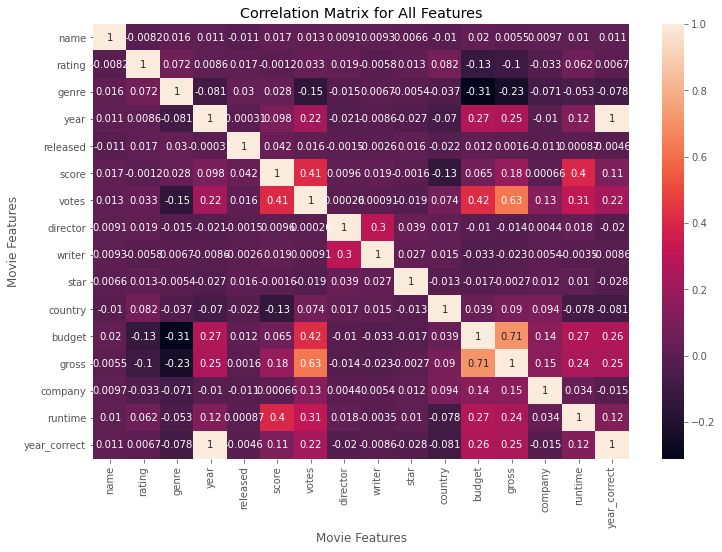

In [42]:
#correlation matrix
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [43]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name          1.000000 -0.008233  0.016173  0.011245 -0.010901  0.017258   
rating       -0.008233  1.000000  0.072315  0.008631  0.016917 -0.001187   
genre         0.016173  0.072315  1.000000 -0.081426  0.030138  0.028084   
year          0.011245  0.008631 -0.081426  1.000000 -0.000311  0.098112   
released     -0.010901  0.016917  0.030138 -0.000311  1.000000  0.042480   
score         0.017258 -0.001187  0.028084  0.098112  0.042480  1.000000   
votes         0.013067  0.033118 -0.145299  0.222818  0.016128  0.409221   
director      0.009111  0.019493 -0.015242 -0.020785 -0.001503  0.009553   
writer        0.009334 -0.005849  0.006699 -0.008563 -0.002594  0.019368   
star          0.006649  0.013404 -0.005415 -0.027259  0.015801 -0.001564   
country      -0.009955  0.081942 -0.037085 -0.070300 -0.021952 -0.134163   
budget        0.020369 -0.126053 -0.310586  0.265604  0.012267  0.064545   
gross         0.005465 -0.102122 -0.230282  0.252066  0.001637  0.182880   
company       0.009702 -0.032616 -0.070755 -0.009988 -0.011378  0.000658   
runtime       0.010391  0.062055 -0.052702  0.120778  0.000868  0.399356   
year_correct  0.010697  0.006741 -0.077911  0.997415 -0.004644  0.105932   

                 votes  director    writer      star   country    budget  \
name          0.013067  0.009111  0.009334  0.006649 -0.009955  0.020369   
rating        0.033118  0.019493 -0.005849  0.013404  0.081942 -0.126053   
genre        -0.145299 -0.015242  0.006699 -0.005415 -0.037085 -0.310586   
year          0.222818 -0.020785 -0.008563 -0.027259 -0.070300  0.265604   
released      0.016128 -0.001503 -0.002594  0.015801 -0.021952  0.012267   
score         0.409221  0.009553  0.019368 -0.001564 -0.134163  0.064545   
votes         1.000000  0.000262  0.000909 -0.019270  0.073783  0.421007   
director      0.000262  1.000000  0.299076  0.039187  0.017469 -0.010364   
writer        0.000909  0.299076  1.000000  0.026812  0.015000 -0.033223   
star         -0.019270  0.039187  0.026812  1.000000 -0.012993 -0.016633   
country       0.073783  0.017469  0.015000 -0.012993  1.000000  0.039057   
budget        0.421007 -0.010364 -0.033223 -0.016633  0.039057  1.000000   
gross         0.628714 -0.014272 -0.023215 -0.002683  0.090079  0.711270   
company       0.133232  0.004379  0.005429  0.012469  0.093996  0.144926   
runtime       0.309167  0.017624 -0.003511  0.010174 -0.078410  0.265287   
year_correct  0.218300 -0.020422 -0.008611 -0.027611 -0.080844  0.259546   

                 gross   company   runtime  year_correct  
name          0.005465  0.009702  0.010391      0.010697  
rating       -0.102122 -0.032616  0.062055      0.006741  
genre        -0.230282 -0.070755 -0.052702     -0.077911  
year          0.252066 -0.009988  0.120778      0.997415  
released      0.001637 -0.011378  0.000868     -0.004644  
score         0.182880  0.000658  0.399356      0.105932  
votes         0.628714  0.133232  0.309167      0.218300  
director     -0.014272  0.004379  0.017624     -0.020422  
writer       -0.023215  0.005429 -0.003511     -0.008611  
star         -0.002683  0.012469  0.010174     -0.027611  
country       0.090079  0.093996 -0.078410     -0.080844  
budget        0.711270  0.144926  0.265287      0.259546  
gross         1.000000  0.152774  0.241335      0.245462  
company       0.152774  1.000000  0.034401     -0.015171  
runtime       0.241335  0.034401  1.000000      0.120604  
year_correct  0.245462 -0.015171  0.120604      1.000000

In [44]:
#unstacking to view all corrrelations by variable
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008233
              genre           0.016173
              year            0.011245
              released       -0.010901
              score           0.017258
              votes           0.013067
              director        0.009111
              writer          0.009334
              star            0.006649
              country        -0.009955
              budget          0.020369
              gross           0.005465
              company         0.009702
              runtime         0.010391
              year_correct    0.010697
rating        name           -0.008233
              rating          1.000000
              genre           0.072315
              year            0.008631
              released        0.016917
              score          -0.001187
              votes           0.033118
              director        0.019493
              writer         -0.005849
              star       

In [45]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.310586
budget        genre          -0.310586
genre         gross          -0.230282
gross         genre          -0.230282
votes         genre          -0.145299
genre         votes          -0.145299
score         country        -0.134163
country       score          -0.134163
rating        budget         -0.126053
budget        rating         -0.126053
gross         rating         -0.102122
rating        gross          -0.102122
year          genre          -0.081426
genre         year           -0.081426
year_correct  country        -0.080844
country       year_correct   -0.080844
              runtime        -0.078410
runtime       country        -0.078410
genre         year_correct   -0.077911
year_correct  genre          -0.077911
genre         company        -0.070755
company       genre          -0.070755
year          country        -0.070300
country       year           -0.070300
genre         runtime        -0.052702
runtime       genre      

In [47]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr 

votes         gross           0.628714
gross         votes           0.628714
budget        gross           0.711270
gross         budget          0.711270
year_correct  year            0.997415
year          year_correct    0.997415
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

Votes and Budget have highest correlation to gross earnings. Company is not highly correlated with gross earnings.